In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/Users/kirtan/Downloads/playground-series-s3e16/train.csv')

In [3]:
df.head()

,id,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,0,I,1.5250,1.1750,0.3750,28.973189,12.728926,6.647958,8.348928,9
1,1,I,1.1000,0.8250,0.2750,10.418441,4.521745,2.324659,3.401940,8
2,2,M,1.3875,1.1125,0.3750,24.777463,11.339800,5.556502,6.662133,9
3,3,F,1.7000,1.4125,0.5000,50.660556,20.354941,10.991839,14.996885,11
4,4,I,1.2500,1.0125,0.3375,23.289114,11.977664,4.507570,5.953395,8


In [4]:
df = df.drop(columns='id')

In [5]:
df.head()

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,I,1.5250,1.1750,0.3750,28.973189,12.728926,6.647958,8.348928,9
1,I,1.1000,0.8250,0.2750,10.418441,4.521745,2.324659,3.401940,8
2,M,1.3875,1.1125,0.3750,24.777463,11.339800,5.556502,6.662133,9
3,F,1.7000,1.4125,0.5000,50.660556,20.354941,10.991839,14.996885,11
4,I,1.2500,1.0125,0.3375,23.289114,11.977664,4.507570,5.953395,8


In [6]:
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Weight            0
Shucked Weight    0
Viscera Weight    0
Shell Weight      0
Age               0
dtype: int64

In [7]:
df.shape

(74051, 9)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74051 entries, 0 to 74050
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             74051 non-null  object 
 1   Length          74051 non-null  float64
 2   Diameter        74051 non-null  float64
 3   Height          74051 non-null  float64
 4   Weight          74051 non-null  float64
 5   Shucked Weight  74051 non-null  float64
 6   Viscera Weight  74051 non-null  float64
 7   Shell Weight    74051 non-null  float64
 8   Age             74051 non-null  int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 5.1+ MB


In [10]:
df['Sex'].unique()

array(['I', 'M', 'F'], dtype=object)

# Encoding

In [11]:
from sklearn.preprocessing import LabelEncoder

In [12]:
Le = LabelEncoder()

In [13]:
df['Sex'] = Le.fit_transform(df['Sex'])

# Data Visualization

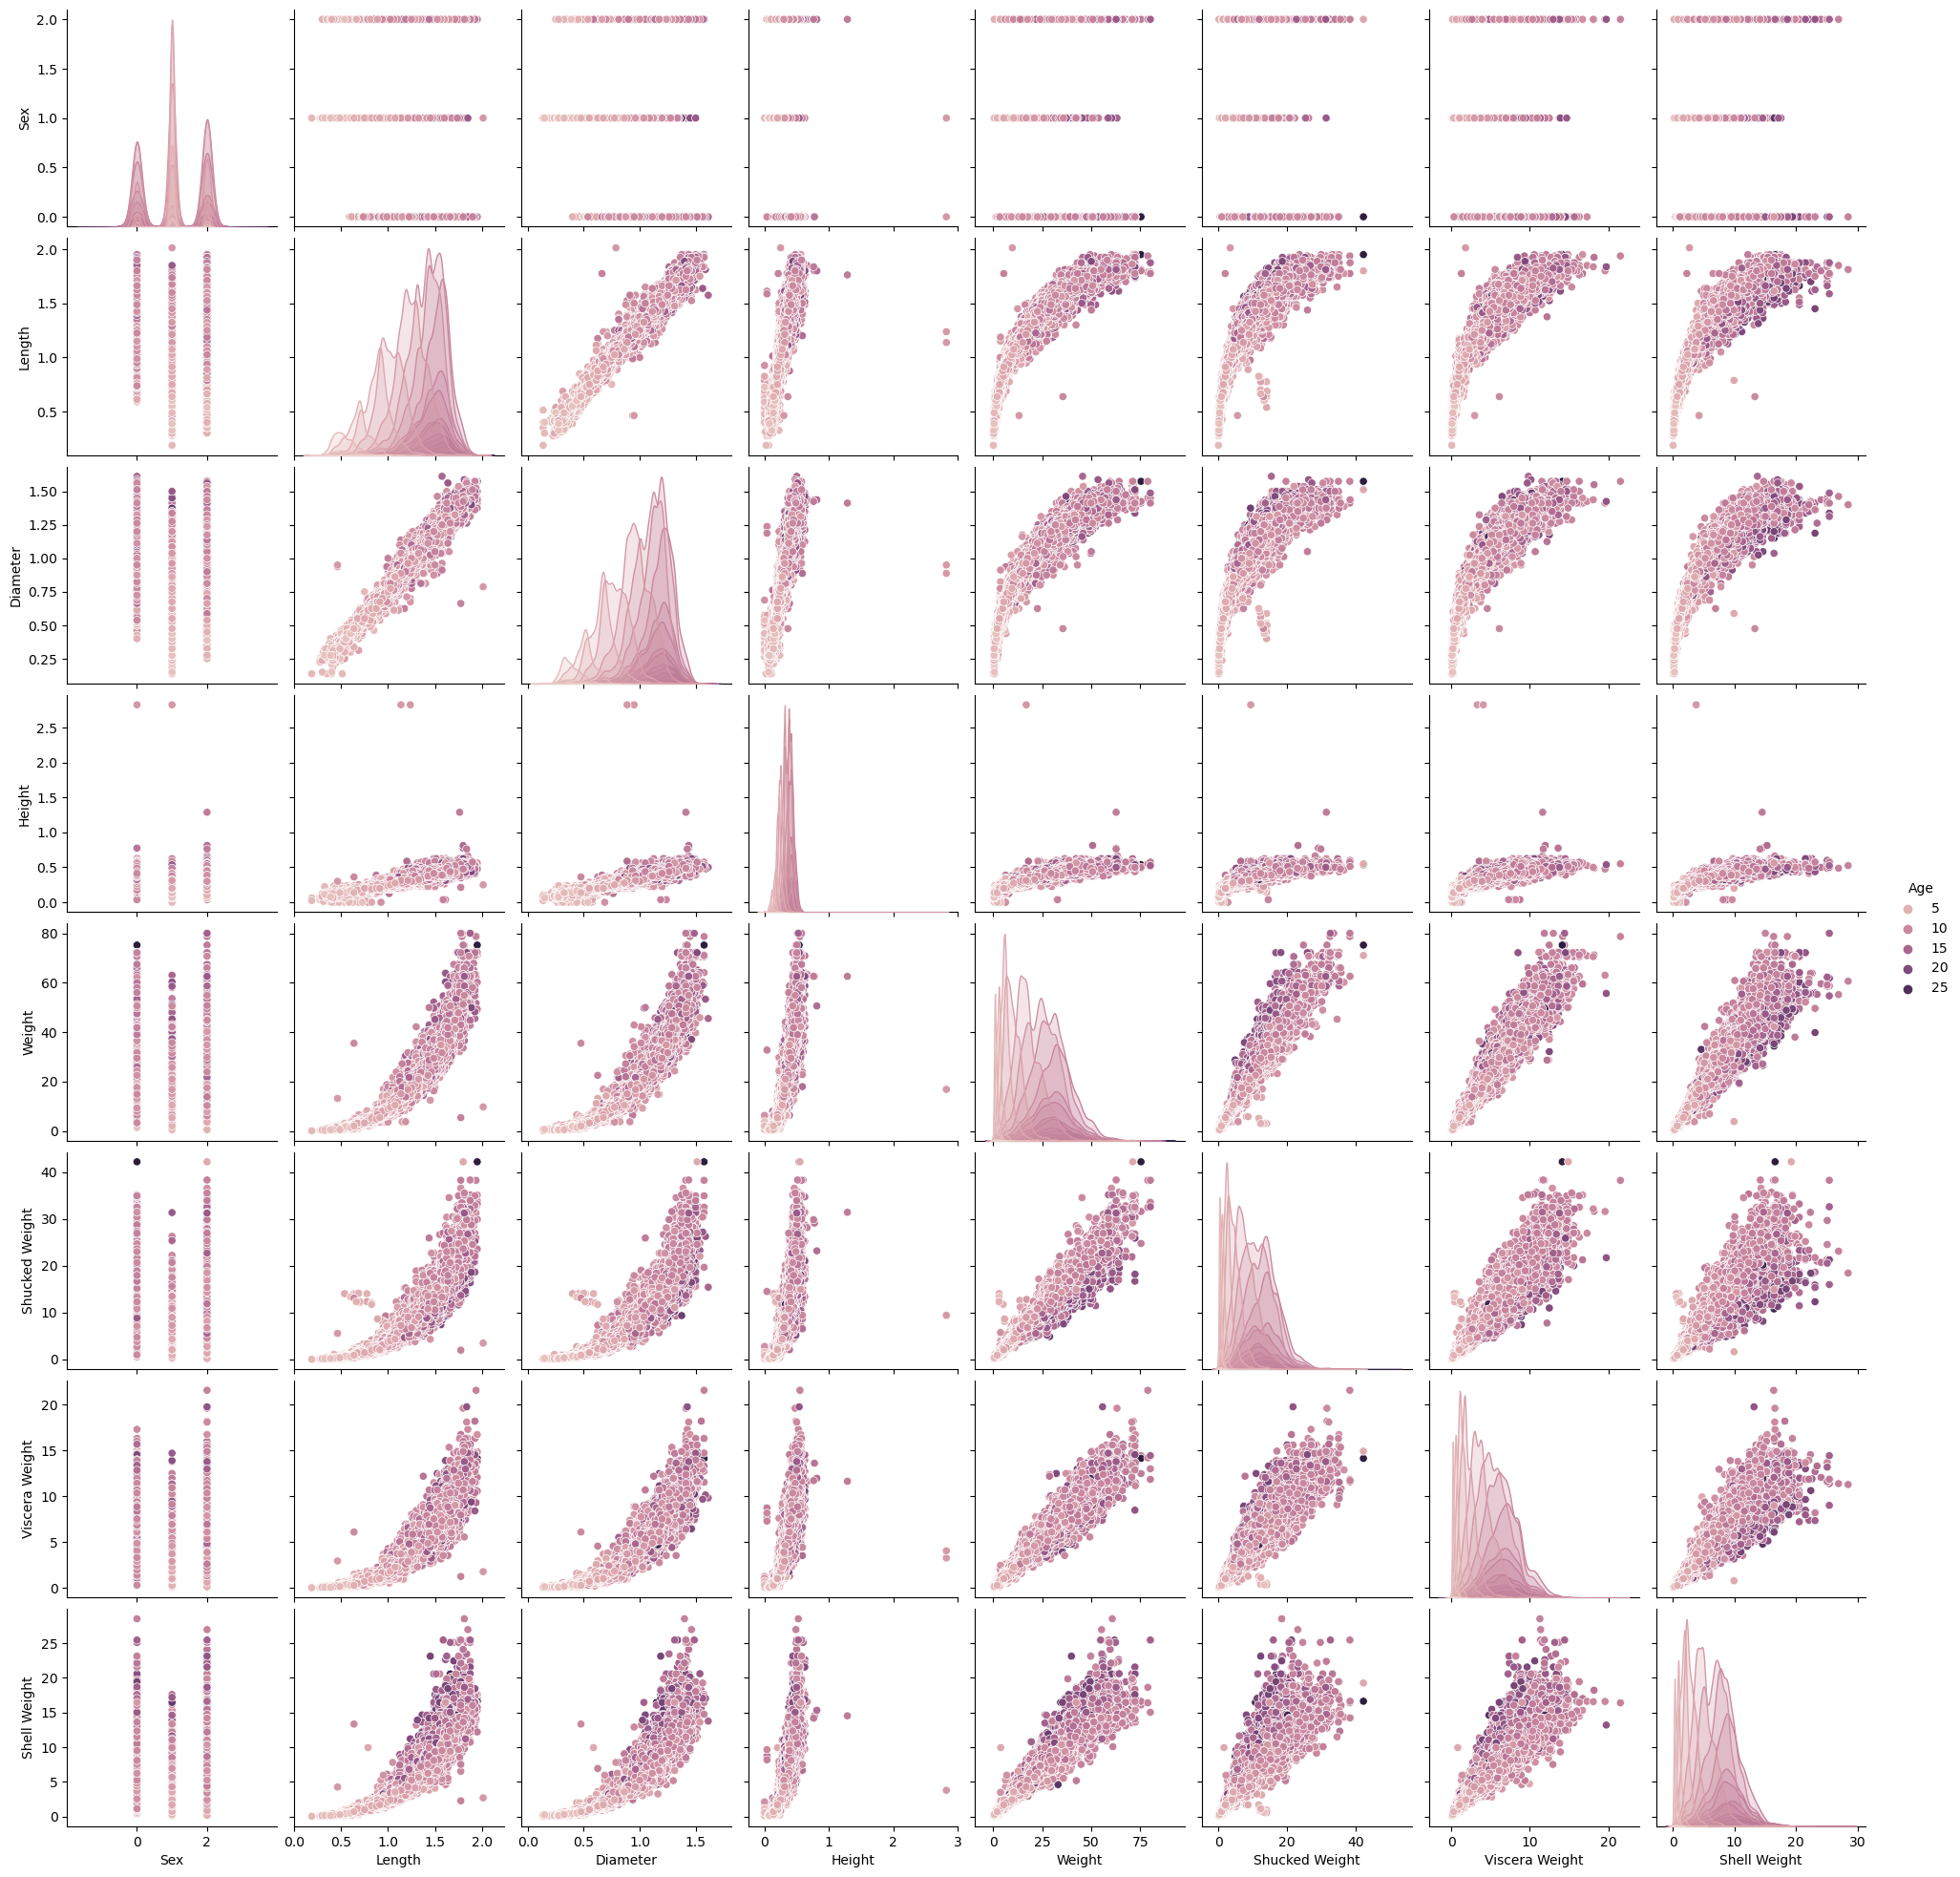

In [15]:
sns.pairplot(df,hue='Age')
plt.show()

HeatMap

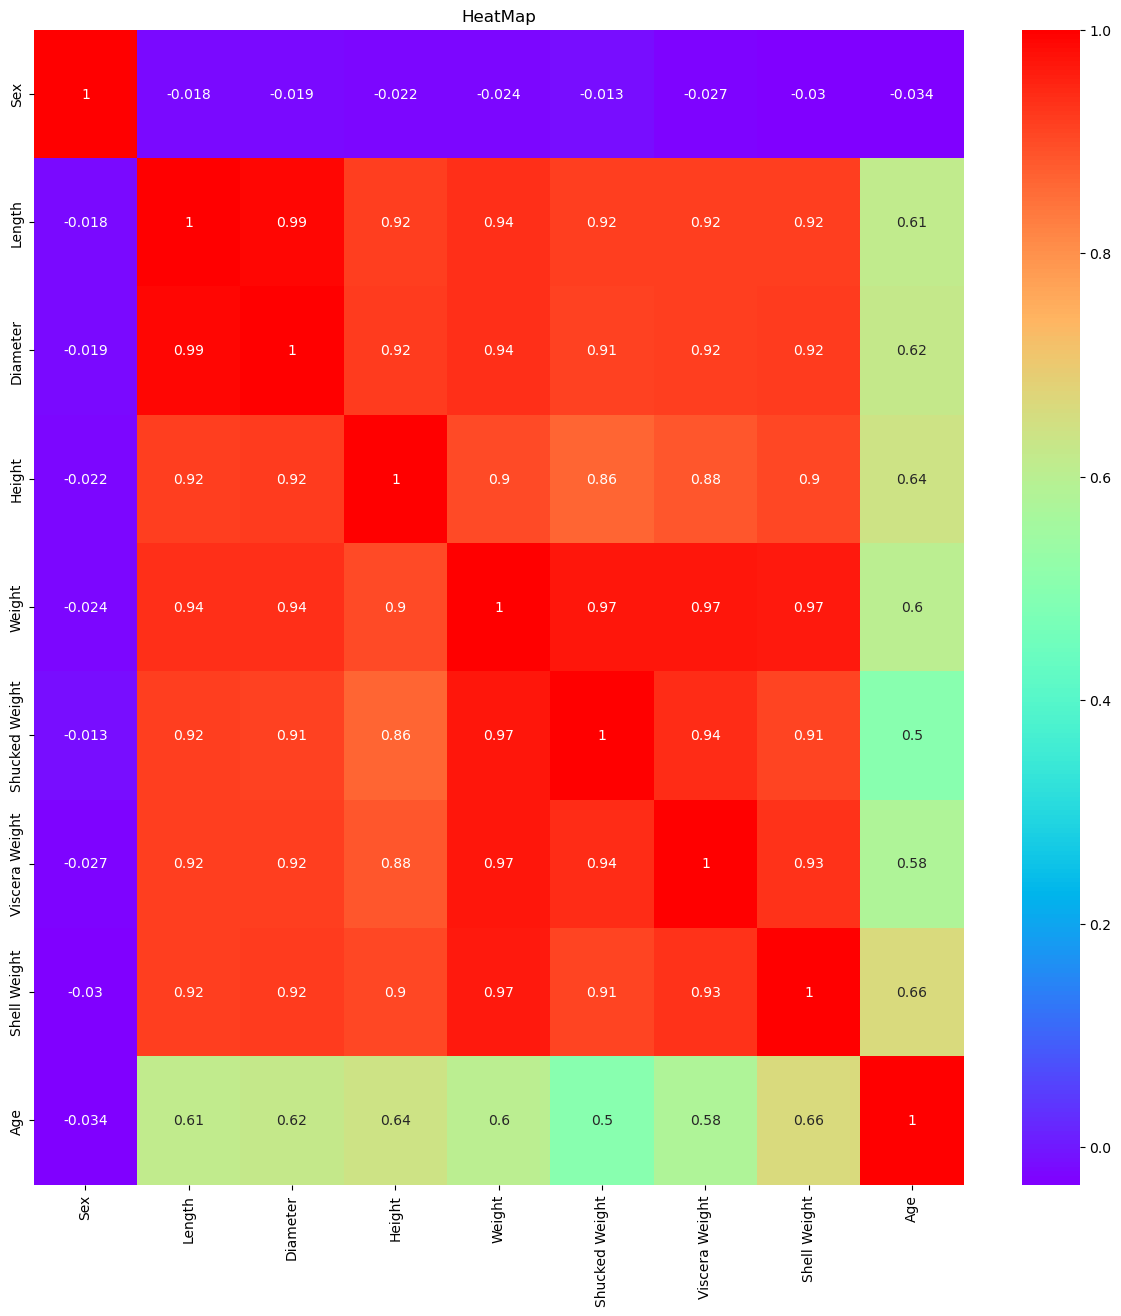

In [18]:
Corr = df.corr()

plt.figure(figsize=(15,15))
sns.heatmap(Corr,annot=True,cmap='rainbow')
plt.title('HeatMap')
plt.show()

# Train & Test Split

In [22]:
X = df.iloc[:,:-1]
X

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight
0,1,1.5250,1.1750,0.3750,28.973189,12.728926,6.647958,8.348928
1,1,1.1000,0.8250,0.2750,10.418441,4.521745,2.324659,3.401940
2,2,1.3875,1.1125,0.3750,24.777463,11.339800,5.556502,6.662133
3,0,1.7000,1.4125,0.5000,50.660556,20.354941,10.991839,14.996885
4,1,1.2500,1.0125,0.3375,23.289114,11.977664,4.507570,5.953395
...,...,...,...,...,...,...,...,...
74046,0,1.6625,1.2625,0.4375,50.660556,20.680960,10.361742,12.332033
74047,1,1.0750,0.8625,0.2750,10.446791,4.323299,2.296310,3.543687
74048,0,1.4875,1.2000,0.4125,29.483480,12.303683,7.540967,8.079607
74049,1,1.2125,0.9625,0.3125,16.768729,8.972617,2.919999,4.280774


In [23]:
y = df.iloc[:,-1:]
y

,Age
0,9
1,8
2,9
3,11
4,8
...,...
74046,10
74047,6
74048,10
74049,8


In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

# Robust

In [78]:
from sklearn.preprocessing import RobustScaler

In [79]:
Rb = RobustScaler()

In [80]:
X_train_Rb = Rb.fit_transform(X_train)

In [81]:
X_test_Rb = Rb.transform(X_test)

# Linear, Ridge and Lasso Regression

In [86]:
from sklearn.linear_model import LinearRegression

In [87]:
LR = LinearRegression()

In [88]:
LR.fit(X_train_Rb,y_train)

LinearRegression()

In [89]:
y_hat = LR.predict(X_test_Rb)

In [90]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [91]:
print('mse:',mean_squared_error(y_test,y_hat))
print('mae:',mean_absolute_error(y_test,y_hat))
print('r2 :',r2_score(y_test,y_hat))

mse: 4.6438687763992075
mae: 1.5115362205225147
r2 : 0.5443420195547681


In [92]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [93]:
R = Ridge()

In [94]:
para = {
    'alpha' : [1,2,3,4,5,7,810,20,50,100]
    }

In [95]:
GD = GridSearchCV(R,param_grid=para,scoring='neg_mean_squared_error',cv=10)

In [96]:
GD.fit(X_train_Rb,y_train)

GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': [1, 2, 3, 4, 5, 7, 810, 20, 50, 100]},
             scoring='neg_mean_squared_error')

In [97]:
GD.best_params_

{'alpha': 1}

In [98]:
GD.best_score_

-4.649930430200846

In [99]:
R = Ridge(alpha=1)

In [100]:
R.fit(X_train_SD,y_train)

Ridge(alpha=1)

In [101]:
y_hat_R = R.predict(X_test_SD)

In [102]:
print('mse R:',mean_squared_error(y_test,y_hat_R))
print('mae R:',mean_absolute_error(y_test,y_hat_R))
print('r2 R:',r2_score(y_test,y_hat_R))

mse R: 4.643827814362884
mae R: 1.5115237019879777
r2 R: 0.5443460387636745


In [103]:
from sklearn.linear_model import Lasso

In [104]:
L = Lasso()

In [105]:
GD2 = GridSearchCV(L,param_grid=para,scoring='neg_mean_squared_error',cv=10)

In [108]:
GD2.fit(X_train_Rb,y_train)

GridSearchCV(cv=10, estimator=Lasso(),
             param_grid={'alpha': [1, 2, 3, 4, 5, 7, 810, 20, 50, 100]},
             scoring='neg_mean_squared_error')

In [109]:
GD2.best_params_

{'alpha': 1}

In [110]:
GD2.best_score_

-7.480459046484171

In [111]:
L.fit(X_train_SD,y_train)

Lasso()

In [112]:
y_hat_L = L.predict(X_test_SD)

In [113]:
print('mse L:',mean_squared_error(y_test,y_hat_L))
print('mae L:',mean_absolute_error(y_test,y_hat_L))
print('r2 L:',r2_score(y_test,y_hat_L))

mse L: 6.682192199058447
mae L: 1.8687357052968177
r2 L: 0.34434103352706136
